**Preprocessing/Analysis**

In [33]:
#Final comment 11/29
#Went over everything (including hard code) 11/28 6:20pm
#Load CSV to Pandas DataFrame
import numpy as np
import pandas as pd

df = pd.read_csv("EuCitiesTemperatures.csv")
df #DataFrame

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [34]:
#1) Fill in the missing latitude and longitude values by calculating the average for that country.
#Round the average to 2 decimal places.
countryGrp = df.groupby("country").mean() #dataframe that shows mean col for all countries

#Fill in missing latitude
for row in df.iterrows():
    country = row[1]["country"]
    countryDf = df[df["country"] == country] #Dataframe for this country
    avgLat = round(countryGrp.loc[country]["latitude"], 2) #avg Lat for this country
    df.loc[df["country"] == country, "latitude"] = df[df["country"] == country]["latitude"].fillna(avgLat)
    
#Fill in missing longitude
for row in df.iterrows():
    country = row[1]["country"]
    countryDf = df[df["country"] == country] #Dataframe for this country
    avgLong = round(countryGrp.loc[country]["longitude"], 2) #avg Long for this country
    df.loc[df["country"] == country, "longitude"] = df[df["country"] == country]["longitude"].fillna(avgLong)
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [35]:
#2 Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). 
#Find out which countries have the maximum number of cities in this geographical band. 
#(More than one country could have the maximum number of values.)


df1 = df[df["latitude"] >= 40]
df2 = df1[df1["latitude"] <= 60]

df3 = df2[df2["longitude"] >= 15]
df4 = df3[df3["longitude"] <= 30]

#print(df4.to_string())
print(df4["city"].to_string())

0           Elbasan
6            Vienna
7             Minsk
8             Orsha
9             Pinsk
10            Brest
11           Hrodna
12            Mazyr
15          Plovdiv
16           Burgas
17           Pleven
18             Ruse
19     Stara Zagora
20            Split
22             Brno
23          Ostrava
27            Tartu
28          Tallinn
69         Budapest
70         Debrecen
71             Gyor
72           Szeged
80             Bari
85           Foggia
91       Daugavpils
92             Riga
93         Klaipeda
94           Kaunas
95          Vilnius
96           Skopje
97            Balti
98         Chisinau
99        Podgorica
108       Bialystok
109       Bydgoszcz
110           Bytom
111          Elblag
112          Kielce
113        Koszalin
114          Poznan
115         Wroclaw
116          Warsaw
119        Botosani
120          Braila
121       Bucharest
122         Craiova
123           Sibiu
124            Arad
125           Bacau
126       Baia Mare


In [36]:
country_count = df4.groupby("country").count()
country_count

,city,population,EU,coastline,latitude,longitude,temperature
country,,,,,,,
Albania,1,1,1,1,1,1,1
Austria,1,1,1,1,1,1,1
Belarus,6,6,6,6,6,6,5
Bulgaria,5,5,5,5,5,5,3
Croatia,1,1,1,1,1,1,1
Czech Republic,2,2,2,2,2,2,2
Estonia,2,2,2,2,2,2,0
Hungary,4,4,4,4,4,4,3
Italy,2,2,2,2,2,2,2


In [37]:
tuple(country_count[country_count["city"] == country_count["city"].max()]["city"].index)

('Poland', 'Romania')

In [38]:
#3 Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).

copy = df.copy()
def getAvgTemp(EU, coastline):
    subsetDF = copy[copy["EU"] == EU]
    subsetDF = subsetDF[subsetDF["coastline"] == coastline]
    return subsetDF["temperature"].mean()


for row in df.iterrows():
    EU_val = row[1]["EU"]
    coastline_val = row[1]["coastline"]
    val = round(getAvgTemp(EU_val, coastline_val), 2)
    df.loc[(df["EU"] == EU_val) & (df["coastline"] == coastline_val), "temperature"] = df.loc[(df["EU"] == EU_val) & (df["coastline"] == coastline_val), "temperature"].fillna(val)
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.31
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


**Visualization**

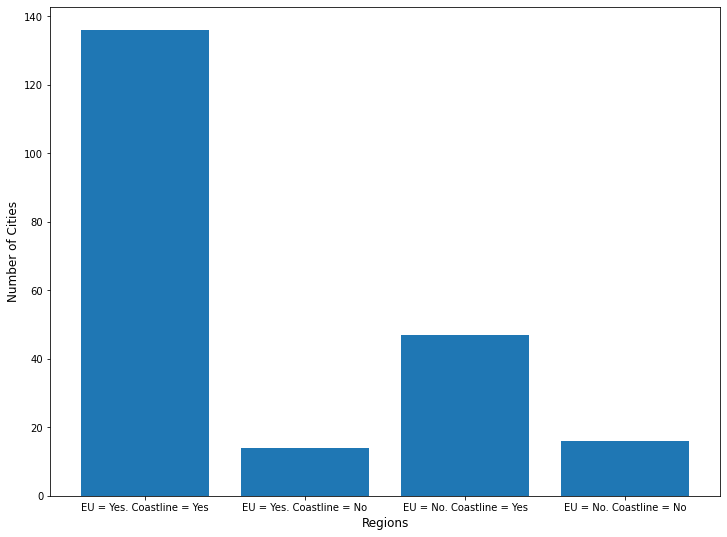

In [39]:
#1 Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.
from matplotlib import pyplot as plt

cityCount = df.groupby(["EU", "coastline"]).count()
cityCount

region_x = ["EU = Yes. Coastline = Yes", "EU = Yes. Coastline = No", "EU = No. Coastline = Yes", "EU = No. Coastline = No"]
num_y = [cityCount.loc["yes", "yes"]["city"], cityCount.loc["yes", "no"]["city"], cityCount.loc["no", "yes"]["city"], cityCount.loc["no", "no"]["city"]]

plt.figure(figsize=(12, 9))
plt.bar(region_x, num_y)
plt.ylabel('Number of Cities',fontsize=12)
plt.xlabel('Regions',fontsize=12)
plt.show()

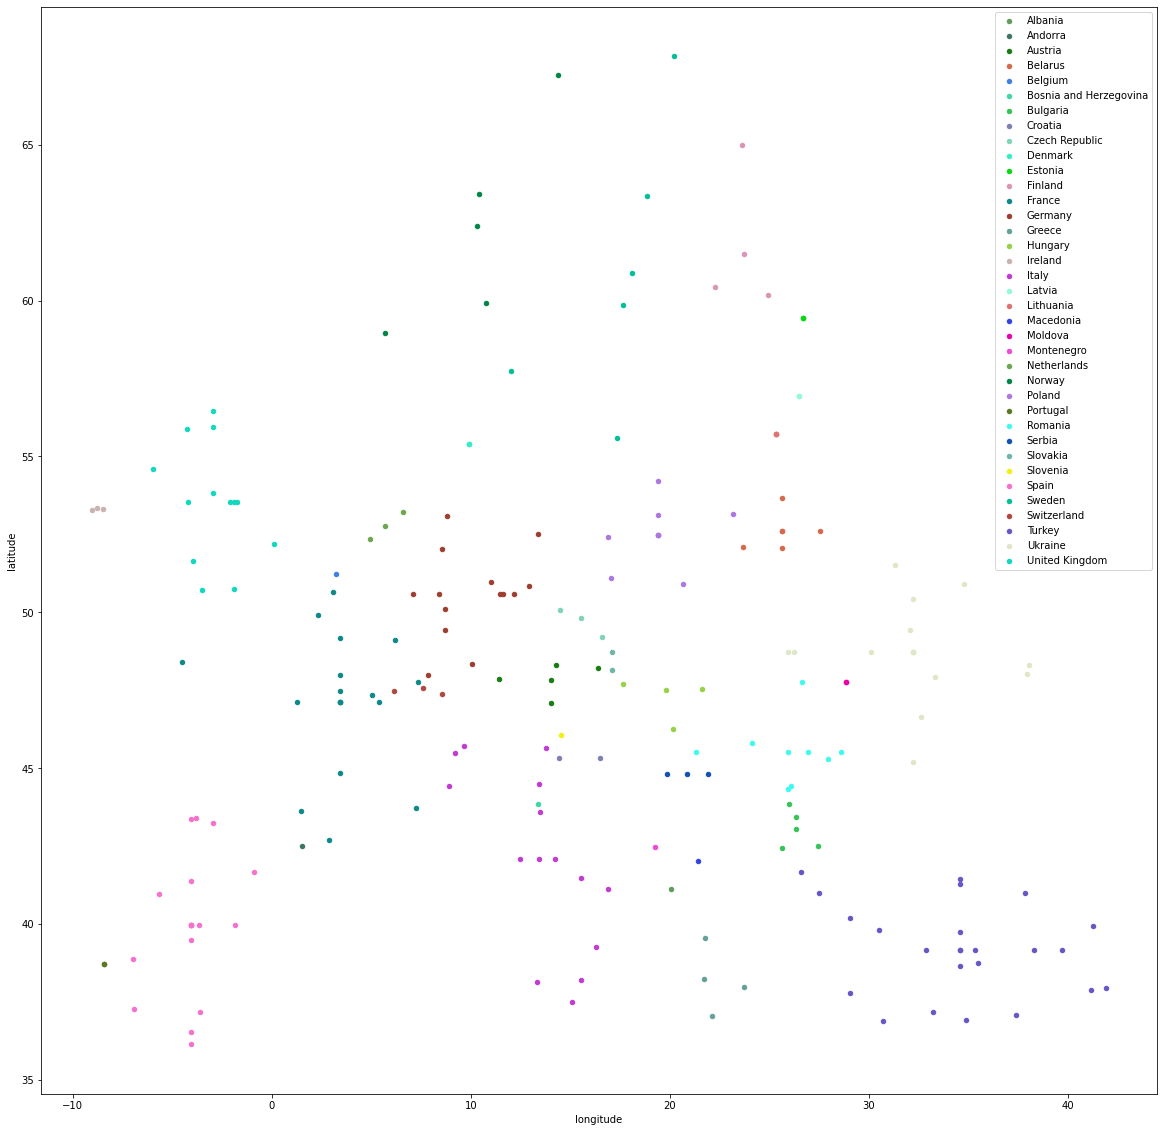

In [40]:
#2. Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.
country_count = df.groupby("country").count()
numb_of_countries = len(country_count.index)

#Generate list of colors
lst_colors = [x for x in range(0, 0xFFFFFF)]
choices_colors = np.random.choice(lst_colors, size=numb_of_countries, replace=False)   # no duplicates

#plotting
fig, ax = plt.subplots(1,1)
fig.set_size_inches(20, 20)
country_types = df["country"].unique() #unique countries
count = 0
for country_typess, choices_colorss in zip(country_types, choices_colors):
    count += 1
    tempDF = df[df["country"] == country_typess]
    tempDF.plot('longitude','latitude', ax = ax, kind='scatter', color = '#' + "%06x" % choices_colorss, label=country_typess)
#print(count)

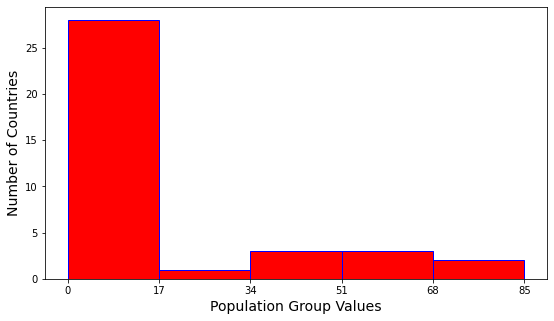

In [41]:
# 3. The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

max_pop = df["population"].max() #gives max population value

upper = 0
if max_pop % 5 == 0:
    upper = max_pop
else:
    upper = max_pop - max_pop % 5 + 5
#print(max_pop, upper)

uniq_pop = df["population"].unique() # array of unique population values
#The population values are unique to each country

plt.figure(figsize=(9, 5))
plt.hist(uniq_pop, bins = range(0, int(upper) + 1, int(upper/5)), color = 'red', edgecolor = 'blue')
plt.xlabel('Population Group Values', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)
plt.xticks(range(0, int(upper) + 1, int(upper/5)))
plt.show()


Text(0.5, 1.0, 'EU = No, Coastline = No')

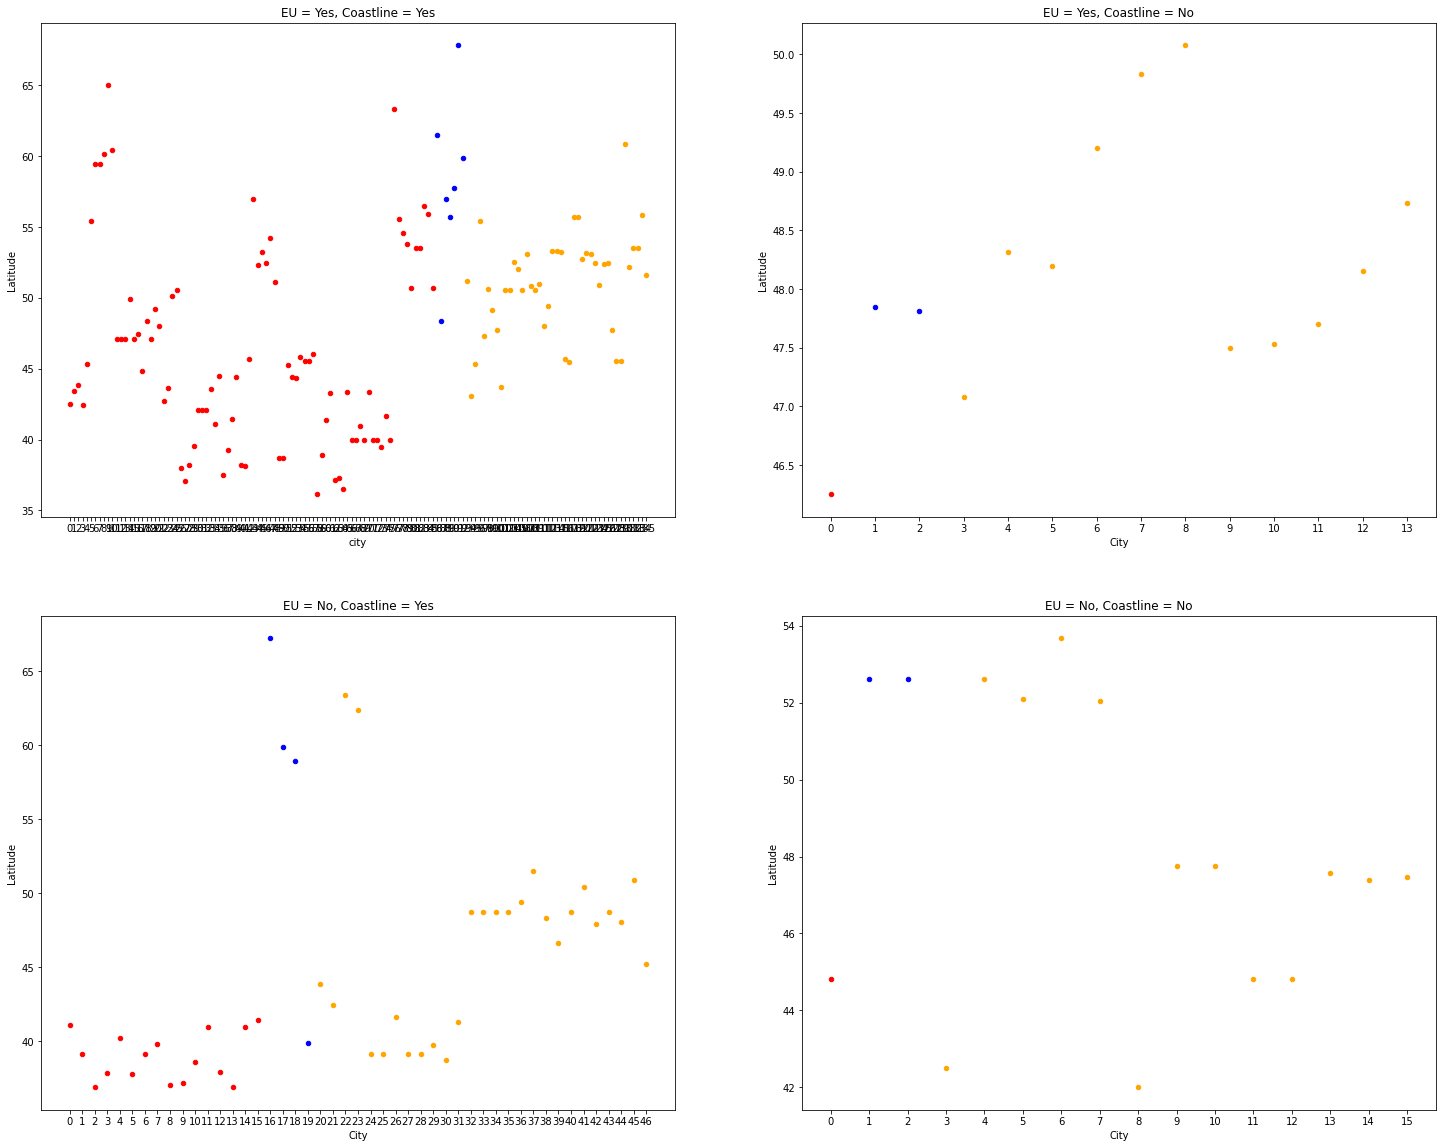

In [42]:
#4) Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
fig, axes = plt.subplots(2, 2, figsize = (25, 20))


#EU = Yes, Coastline = Yes
df0 = df.loc[(df["EU"] == 'yes') & (df["coastline"] == 'yes')]

df0Red = df0[df0["temperature"] > 10]
df0Red.plot("city",'latitude',ax=axes[0][0], kind='scatter', color = 'red')

df0Blue = df0[df0["temperature"] < 6]
df0Blue.plot("city",'latitude',ax=axes[0][0], kind='scatter', color = 'blue')

df0Orange = df0.loc[(df0["temperature"] >= 6) & (df0["temperature"] <= 10)]
df0Orange.plot("city",'latitude',ax=axes[0][0], kind='scatter', color = 'orange')

axes[0][0].set_xticks(range(0, len(df0["city"])))
axes[0][0].set_xticklabels(range(0, len(df0["city"])))
axes[0][0].set_xlabel("city")
axes[0][0].set_ylabel("Latitude")
axes[0][0].set_title("EU = Yes, Coastline = Yes")



#EU = Yes, Coastline = No
df1 = df.loc[(df["EU"] == 'yes') & (df["coastline"] == 'no')]

df1Red = df1[df1["temperature"] > 10]
df1Red.plot("city",'latitude',ax=axes[0][1], kind='scatter', color = 'red')

df1Blue = df1[df1["temperature"] < 6]
df1Blue.plot("city",'latitude',ax=axes[0][1], kind='scatter', color = 'blue')

df1Orange = df1.loc[(df1["temperature"] >= 6) & (df1["temperature"] <= 10)]
df1Orange.plot("city",'latitude',ax=axes[0][1], kind='scatter', color = 'orange')

axes[0][1].set_xticks(range(0, len(df1["city"])))
axes[0][1].set_xticklabels(range(0, len(df1["city"])))
axes[0][1].set_xlabel("City")
axes[0][1].set_ylabel("Latitude")
axes[0][1].set_title("EU = Yes, Coastline = No")




#EU = No, Coastline = Yes
df2 = df.loc[(df["EU"] == 'no') & (df["coastline"] == 'yes')]
df2Red = df2[df2["temperature"] > 10]
df2Red.plot("city",'latitude',ax=axes[1][0], kind='scatter', color = 'red')

df2Blue = df2[df2["temperature"] < 6]
df2Blue.plot("city",'latitude',ax=axes[1][0], kind='scatter', color = 'blue')

df2Orange = df2.loc[(df2["temperature"] >= 6) & (df2["temperature"] <= 10)]
df2Orange.plot("city",'latitude',ax=axes[1][0], kind='scatter', color = 'orange')

axes[1][0].set_xticks(range(0, len(df2["city"])))
axes[1][0].set_xticklabels(range(0, len(df2["city"])))
axes[1][0].set_xlabel("City")
axes[1][0].set_ylabel("Latitude")
axes[1][0].set_title("EU = No, Coastline = Yes")




#EU = No, Coastline = No
df3 = df.loc[(df["EU"] == 'no') & (df["coastline"] == 'no')]
df3Red = df3[df3["temperature"] > 10]
df3Red.plot("city",'latitude',ax=axes[1][1], kind='scatter', color = 'red')

df3Blue = df3[df3["temperature"] < 6]
df3Blue.plot("city",'latitude',ax=axes[1][1], kind='scatter', color = 'blue')

df3Orange = df3.loc[(df3["temperature"] >= 6) & (df3["temperature"] <= 10)]
df3Orange.plot("city",'latitude',ax=axes[1][1], kind='scatter', color = 'orange')

axes[1][1].set_xticks(range(0, len(df3["city"])))
axes[1][1].set_xticklabels(range(0, len(df3["city"])))
axes[1][1].set_xlabel("City")
axes[1][1].set_ylabel("Latitude")
axes[1][1].set_title("EU = No, Coastline = No")


